<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Inisiasi" data-toc-modified-id="Inisiasi-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inisiasi</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Pengujian-Model" data-toc-modified-id="Pengujian-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pengujian Model</a></span><ul class="toc-item"><li><span><a href="#Seleksi-Algoritma-Model" data-toc-modified-id="Seleksi-Algoritma-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Seleksi Algoritma Model</a></span></li><li><span><a href="#Sanity-Checking" data-toc-modified-id="Sanity-Checking-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sanity Checking</a></span></li><li><span><a href="#Memperbaiki-Ketidakseimbangan-Kelas" data-toc-modified-id="Memperbaiki-Ketidakseimbangan-Kelas-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Memperbaiki Ketidakseimbangan Kelas</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Downsampling</a></span></li></ul></li></ul></li><li><span><a href="#Kesimpulan" data-toc-modified-id="Kesimpulan-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kesimpulan</a></span></li></ul></div>

## Introduction

Kali ini, kita mendapatkan informasi bahwa jumlah nasabah Bank Beta sedikit demi sedikit mengalami penurunan di setiap bulannya. Untuk menghemat biaya, pihak dari Bank Beta memutuskan untuk berusaha mempertahankan nasabah lama. Untuk bisa menentukan nasabah mana yang akan segera meninggalkan bank atau tidak, kita diminta untuk membuat sebuah model yang bisa memprediksi kemungkinan tersebut. 

Kita mendapat data dari Bank Beta terkait perilaku klien mereka dan status kontrak mereka dengan bank. Karena kita perlu mengidentifikasi apakah seorang klient akan berpotensi untuk meninggalkan bank atau tidak, maka kita perlu sebuah model dengan skor F1 yang baik. Dan dari permintaan Bank Beta, model yang harus kita kembangkan setidaknya bisa memiliki skor F1 minimal 0.59 untuk test dataset. 

Untuk bisa mendapatkan skor F1 semaksimal mungkin, kita perlu melakukan beberapa langkah yaitu:
1. Preprocessing
2. Pengujian Model
3. Sanity Check
4. Mengatasi ketidakseimbangan kelas (Bila terdapat masalah pada hasil sanity check)
5. Pengujian Ulang Model 

Preprocessing dilakukan  untuk memastikan bahwa data yang kita gunakan untuk pembuatan model dalam kondisi yang baik. Preprocessing dilakukan dengan beberapa cara diantaranya One Hot Encoding (OHE), Ordinal Encoding, Label Encoding, dan Feature Scaling. Berikutnya, kita akan melakukan pelatihan model untuk menguji seberapa besar akurasi dari model yang kita miliki. Setelah itu kita akan melakukan sanity check untuk model yang kita miliki, dengan tujuan memastikan apakah hasil akurasi tinggi yang kita miliki masuk akal atau tidak. Terakhir, bila model yang kita sudah kembangkan tidak lolos sanity check, maka kita perlu melakukan beberapa proses seperti Upsampling atau Downsampling, yaitu proses untuk mengatasi ketidakseimbangan kelas (imbalance class).

## Inisiasi

Sebelum memulai proses analisa, kita perlu mempersiapkan dulu semua modul dan data yang kita gunakan dan perlukan untuk penelitian ini.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,precision_recall_curve, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/Churn.csv')

Berikutnya, kita akan mengecek data yang kita miliki, apakah terdapat data dengan nilai yang hilang atau tidak. Bila ada, kita akan mengubah data tersebut agar proses pelatihan model bisa maksimal.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.duplicated().sum()

0

In [5]:
data[data['Tenure'].isna()]
data['Tenure'] = data['Tenure'].fillna(0)
data.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6014,6015,15747323,Vasilyeva,535,Spain,Male,48,9.0,109472.47,1,1,0,157358.43,1
9242,9243,15630704,Haworth,612,Germany,Male,32,9.0,106520.73,2,1,0,177092.16,0
8044,8045,15717489,Martin,835,France,Male,23,9.0,0.00,1,1,0,19793.73,1
9682,9683,15694628,Walker,686,Germany,Female,39,4.0,157731.60,2,1,0,162820.60,0
3879,3880,15757541,Rickard,778,France,Female,33,9.0,151772.63,2,0,0,180249.94,1
3145,3146,15775590,Mackay,482,Germany,Female,48,2.0,69329.47,1,0,0,102640.52,1
837,838,15589488,Ch'eng,686,Germany,Female,56,5.0,111642.08,1,1,1,80553.87,0
438,439,15783501,Findlay,800,France,Female,38,0.0,168190.33,2,1,0,68052.08,0
5134,5135,15641604,Frolova,850,France,Female,55,10.0,98488.08,1,1,0,155879.57,1
6948,6949,15803750,Ball,750,Spain,Female,33,3.0,161801.47,1,0,1,153288.97,1


In [6]:
data.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2014,2015,15679024,Udinesi,553,France,Male,32,3.0,116324.53,1,1,0,77304.49,0
5195,5196,15658589,Brady,850,Spain,Male,38,2.0,94652.04,1,1,1,171960.76,0
3557,3558,15594827,Glasgow,675,France,Male,34,1.0,124619.33,2,0,1,163667.56,0
7063,7064,15766183,Ferguson,580,Germany,Male,76,2.0,130334.84,2,1,1,51672.08,0
490,491,15714689,Houghton,591,Spain,Male,29,1.0,97541.24,1,1,1,196356.17,0
2429,2430,15712176,Burke,816,France,Male,31,8.0,0.00,2,1,1,28407.40,0
1854,1855,15711455,Kuo,740,Germany,Female,36,4.0,109044.60,1,0,0,94554.74,1
5673,5674,15572801,Krischock,639,Spain,Male,34,5.0,139393.19,2,0,0,33950.08,0
2895,2896,15646859,Heydon,621,Germany,Male,47,7.0,107363.29,1,1,1,66799.28,0
2369,2370,15708212,Lin,648,Spain,Female,54,7.0,118241.02,1,1,0,172586.89,1


## Preprocessing

Pada bagian ini, kita akan melakukan preprocessing pada data yang kita miliki. Pertama, kita perlu mengubah column kategori gender dan geography menjadi numeric dengan metode One Hot Encoding (OHE). 

In [7]:
data[['Age', 'CreditScore']].describe()
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
#OHE pada Gender dan Geography
data_ohe = pd.get_dummies(data, columns=['Gender'])
data_ohe = pd.get_dummies(data_ohe, columns=['Geography'], drop_first=True)
data_ohe.sample(20)

#Label encoding pada kolom Surname
encoder = OrdinalEncoder()
data_ohe_ordinal = pd.DataFrame(encoder.fit_transform(data_ohe), columns=data_ohe.columns)
data_ohe_ordinal.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_Germany,Geography_Spain
115,115.0,4390.0,1429.0,237.0,12.0,9.0,4273.0,1.0,1.0,1.0,3672.0,0.0,1.0,0.0,1.0,0.0
7490,7490.0,5509.0,212.0,263.0,17.0,2.0,1029.0,0.0,1.0,1.0,4337.0,0.0,1.0,0.0,0.0,0.0
2360,2360.0,4171.0,304.0,127.0,23.0,5.0,2412.0,0.0,1.0,0.0,4467.0,0.0,1.0,0.0,1.0,0.0
3984,3984.0,5189.0,2549.0,443.0,20.0,8.0,0.0,1.0,1.0,1.0,3305.0,0.0,0.0,1.0,0.0,1.0
148,148.0,5512.0,546.0,344.0,26.0,9.0,3249.0,0.0,1.0,0.0,3704.0,0.0,0.0,1.0,0.0,0.0
8212,8212.0,2163.0,547.0,212.0,14.0,7.0,0.0,0.0,1.0,0.0,9895.0,1.0,0.0,1.0,0.0,0.0
3610,3610.0,5842.0,871.0,189.0,38.0,1.0,4198.0,0.0,1.0,0.0,5367.0,1.0,1.0,0.0,0.0,0.0
6113,6113.0,776.0,2341.0,205.0,18.0,2.0,0.0,1.0,0.0,1.0,6294.0,0.0,0.0,1.0,0.0,1.0
8562,8562.0,3254.0,2142.0,306.0,45.0,7.0,5329.0,0.0,0.0,0.0,5953.0,1.0,0.0,1.0,0.0,0.0
7655,7655.0,1143.0,1804.0,357.0,20.0,4.0,2800.0,0.0,0.0,1.0,3514.0,0.0,0.0,1.0,0.0,0.0


Setelah itu, kita perlu melakukan proses feature scaling untuk menstandarkan skala pada kolom balance dan EstimatedSalary, karena memiliki skala yang lebih besar dibanding fitur lainnya, dan mencegah algoritma untuk mendeteksi kedua fitur ini lebih penting dibanding fitur lainnya.

In [9]:
target = data_ohe_ordinal['Exited']
features = data_ohe_ordinal.drop('Exited', axis=1)

numeric = ['Balance','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features[numeric])
features.loc[:, numeric] = scaler.transform(features[numeric])

features.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_Germany,Geography_Spain
685,685.0,1357.0,726.0,270.0,24.0,2.0,1.963277,0.0,0.0,0.0,-1.227625,0.0,1.0,0.0,1.0
9485,9485.0,3597.0,2629.0,459.0,19.0,0.0,-0.533986,0.0,1.0,0.0,0.176812,0.0,1.0,0.0,1.0
699,699.0,6845.0,803.0,351.0,15.0,0.0,1.975982,0.0,1.0,1.0,0.138704,0.0,1.0,1.0,0.0
8032,8032.0,7580.0,359.0,276.0,16.0,5.0,-0.958432,1.0,1.0,1.0,0.052789,0.0,1.0,0.0,0.0
4319,4319.0,7746.0,1616.0,218.0,16.0,0.0,1.334609,1.0,1.0,0.0,-0.950133,0.0,1.0,0.0,1.0
9538,9538.0,276.0,2427.0,386.0,11.0,2.0,-0.958432,1.0,1.0,0.0,0.430747,0.0,1.0,0.0,0.0
2178,2178.0,1720.0,1623.0,383.0,25.0,1.0,0.407605,0.0,1.0,0.0,-1.438602,1.0,0.0,0.0,1.0
3757,3757.0,4526.0,35.0,202.0,27.0,6.0,-0.700094,0.0,1.0,0.0,-0.790081,1.0,0.0,0.0,1.0
7261,7261.0,6759.0,630.0,335.0,35.0,1.0,0.289024,0.0,0.0,1.0,-1.244946,1.0,0.0,0.0,0.0
4220,4220.0,5822.0,1362.0,198.0,27.0,1.0,-0.958432,0.0,0.0,0.0,0.456383,1.0,0.0,0.0,1.0


Terakhir, kita perlu membagi data kita menjadi 3 bagian dengan proporsi 60% data training, 20% data validasi dan 20% data test.

In [10]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

## Pengujian Model

Setelah data yang dimiliki dirasa sudah dalam kondisi terbaik untuk dianalisa, kita akan melakukan proses pengujian model dengan menggunakan beberapa algoritma untuk menentukan algoritma apa yang memiliki akurasi tertinggi. Algoritma tersebut diantaranya Decision Tree Classifier, Random Forest Classifier dan Logistic Regression. Kita akan memilih algoritma dengan akurasi tertinggi untuk dilakukan proses sanity checking.

### Seleksi Algoritma Model

In [11]:
#Pengujian model tanpa imbalance class
#Decision tree classifier
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_validation = model.predict(features_valid)
    print(f'depth: {depth}, accuracy: {accuracy_score(target_valid, predictions_validation)}')

depth: 1, accuracy: 0.791
depth: 2, accuracy: 0.824
depth: 3, accuracy: 0.838
depth: 4, accuracy: 0.852
depth: 5, accuracy: 0.8515
depth: 6, accuracy: 0.861
depth: 7, accuracy: 0.854
depth: 8, accuracy: 0.854
depth: 9, accuracy: 0.845
depth: 10, accuracy: 0.842


In [12]:
#Random forest
for est in range(1,11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    print(f'est: {est}, accuracy: {score}')

est: 1, accuracy: 0.7595
est: 2, accuracy: 0.8145
est: 3, accuracy: 0.8105
est: 4, accuracy: 0.8285
est: 5, accuracy: 0.8315
est: 6, accuracy: 0.84
est: 7, accuracy: 0.839
est: 8, accuracy: 0.8465
est: 9, accuracy: 0.845
est: 10, accuracy: 0.8475


In [13]:
#Logistic Regression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
score = model.score(features_valid, target_valid)
print(f'score: {score}')

score: 0.803


### Sanity Checking

Dari proses pengujian sebelumnya, tanpa mempertimbangkan ketidakseimbangan kelas, kita mendapatkan model dengan akurasi tertinggi menggunakan algoritma Decision Tree Classifier dan kedalaman (depth) adalah 5. Untuk seterusnya, kita akan menggunakan model tersebut untuk mencari skor F1 terbaik. Sebelumnya, kita perlu melakukan sanity checking untuk mengecek kenormalan dari akurasi yang kita dapatkan.

In [14]:
print(target.value_counts(normalize=True))

Exited
0.0    0.7963
1.0    0.2037
Name: proportion, dtype: float64


In [15]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print(f'Recall: {recall_score(target_test, predicted_test)}')
print(f'Precision: {precision_score(target_test, predicted_test)}')
print(f'F1 Score: {f1_score(target_test, predicted_test)}')

Recall: 0.36879432624113473
Precision: 0.7536231884057971
F1 Score: 0.49523809523809526


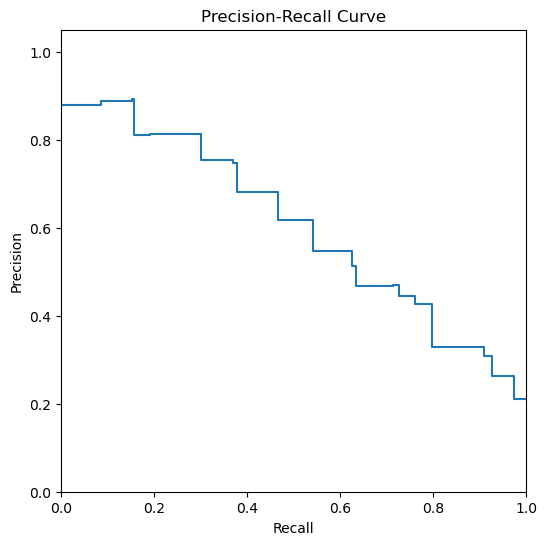

In [16]:
probabilities_test = model.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

Dari hasil tersebut, terdapat perbedaan jumlah data antara nilai 0 dan 1. Hal ini membuat model yang kita miliki cenderung dapat memprediksi kelas negatif (0) dengan sangat baik, tapi tidak dengan nilai positif (1). Untuk memperbaiki ini, kita akan menggunakan 2 metode untuk mengatasi ketidakseimbangan dengan metode upsampling yaitu menambah data yang sedikit atau downsamping yaitu mengurangi data yang lebih banyak. 

### Memperbaiki Ketidakseimbangan Kelas

#### Upsampling

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [18]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5)
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print(f'Recall: {recall_score(target_test, predicted_test)}')
print(f'Precision: {precision_score(target_test, predicted_test)}')
print(f'F1 Score: {f1_score(target_test, predicted_test)}')

Recall: 0.6643026004728132
Precision: 0.5174953959484346
F1 Score: 0.5817805383022775


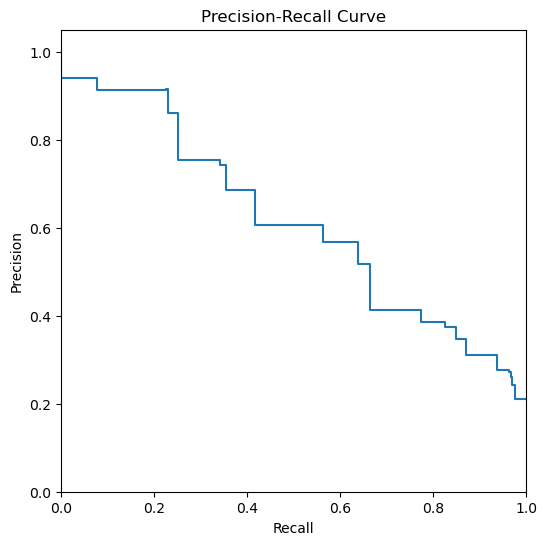

In [19]:
probabilities_test = model.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

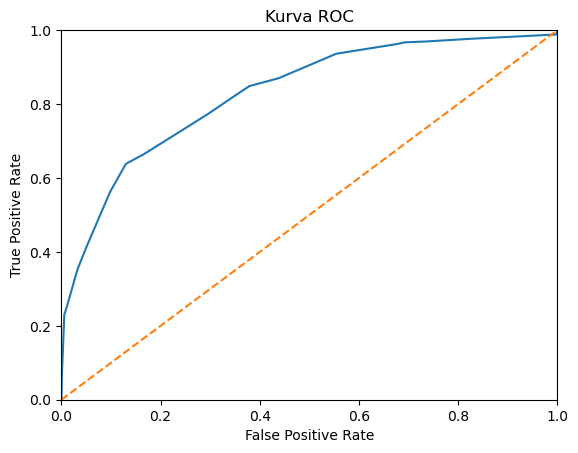

In [20]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC")
plt.show()

In [21]:
#Cek AUC-ROC
print(f'AUC-ROC: {roc_auc_score(target_test, probabilities_one_test)}')

AUC-ROC: 0.8297744917707411


Dengan metode Upsampling, F1 Score yang kita miliki sebesar 0.58, yang artinya belum memenuhi syarat dari penelitian ini dimana harus mencapai 0.59. Nilai F1 yang kita dapat menunjukan keseimbangan antara presisi dan recall, tapi masih ada ruang untuk ditingkatkan. Sedangkan ROC Score yang kita dapat cukup tinggi di angka 0.82, yang artinya model cukup mampu membedakan antara positif dan negatif.

#### Downsampling

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [23]:

model = DecisionTreeClassifier(random_state=12345, max_depth=5)
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print(f'Recall: {recall_score(target_test, predicted_test)}')
print(f'Precision: {precision_score(target_test, predicted_test)}')
print(f'F1 Score: {f1_score(target_test, predicted_test)}')

Recall: 0.6879432624113475
Precision: 0.5388888888888889
F1 Score: 0.6043613707165109


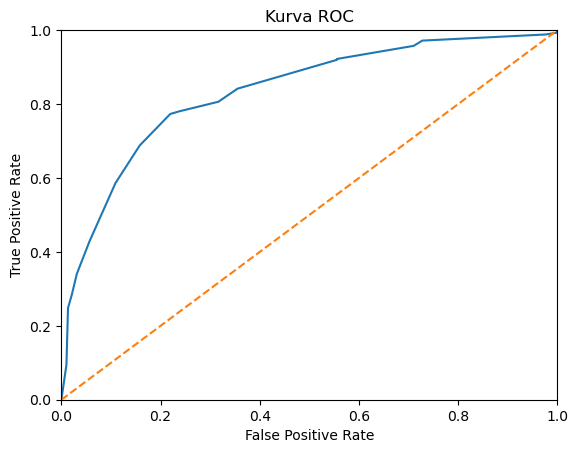

In [24]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC")
plt.show()

In [25]:
print(f'AUC-ROC: {roc_auc_score(target_test, probabilities_one_test)}')

AUC-ROC: 0.8330365133546503


Dengan metode downsampling, kita mendapatkan nilai F1 yang lebih tinggi. Meskipun tidak jauh berbeda dengan yang kita dapatkan pada metode upsampling, namun skor ini sudah memenuhi persyaratan yang diminta oleh Bank Beta. 

## Kesimpulan

Pada penelitian ini dilakukan dengan langkah-langkah umum, dimulai dari preprocessing untuk memastikan data yang akan dilatih sudah dalam kondisi yang baik agar hasil model juga semaksimal mungkin. Pada proses pertama ini, metode yang dilakukan adalah mengubah beberapa kolom dengan metode oHE, dan Ordinal Encoding, lalu terakhir adalah Feature Scaling agar skala pada data yang dilatih seimbang. 

Setelah itu, baru dimulai proses pengujian model, dimulai dari pembagian data ke beberapa kelompok yaitu data train, validation dan testing. Lalu, mulai melakukan proses pengujian model tanpa mempertimbangkan ketidakseimbangan kelas. Dari hasil ini, kita mendapatkan akurasi tertinggi dengan menggunakan algoritma Decision Tree Classifier. Namun, setelah dilakukan sanity check, terdapat perbedaan jumlah data pada data positif dan negatif dengan rasio 1:4. 

Kita menggunakan 2 metode perbaikan masalah ketidakseimbangan kelas, yaitu dengan Upsampling dan Downsampling. Hasilnya, metode downsamping memberikan hasil F1 skor yang sedikit lebih baik dari upsampling. Meski demikian, hasil F1 yang didapat dengan metode downsampling sudah cukup untuk memenuhi persyaratan yang diberikan. 